# Distribuições de probabilidade

## Carregar módulos

In [1]:
from itertools import product, permutations, combinations, combinations_with_replacement
from math import factorial

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, expon, norm

## Carregar dados

In [4]:
dados_acidentes = pd.read_csv('acidentes.csv')

In [5]:
dados_acidentes.head()

,id_acidente,data_acidente,tipo_lesao,risco_classificacao
0,1,2014-02-11,Laceração,Leve
1,2,2014-02-05,Ferimentos Perfurantes,Médio
2,3,2014-01-31,Contusão,Leve
3,4,2014-01-13,Corte,Leve
4,5,2014-02-14,Contusão,Médio


In [6]:
dados_vinho = pd.read_csv('vinho_nacional.csv', sep = ';', decimal = ',')

In [7]:
dados_vinho.head()

,preco_vinho_italiano,gasto_propaganda,temperatura,vendas_vinho_nacional
0,50,230,27,328
1,50,232,26,328
2,58,235,27,330
3,56,242,27,330
4,62,245,28,335


## Exemplo Permutação e Combinação

- Criar permutações sem repetição

In [ ]:
cores = ['preta', 'vermelha', 'amarela']

In [ ]:
permutacoes = permutations(cores, 3)

In [ ]:
list(permutacoes)

[('preta', 'vermelha', 'amarela'),
 ('preta', 'amarela', 'vermelha'),
 ('vermelha', 'preta', 'amarela'),
 ('vermelha', 'amarela', 'preta'),
 ('amarela', 'preta', 'vermelha'),
 ('amarela', 'vermelha', 'preta')]

- Criar permutações com repetições

In [ ]:
cores = ['preta', 'vermelha', 'amarela']

In [ ]:
perm_repeticao = product(cores, repeat=3)

In [ ]:
list(perm_repeticao)

[('preta', 'preta', 'preta'),
 ('preta', 'preta', 'vermelha'),
 ('preta', 'preta', 'amarela'),
 ('preta', 'vermelha', 'preta'),
 ('preta', 'vermelha', 'vermelha'),
 ('preta', 'vermelha', 'amarela'),
 ('preta', 'amarela', 'preta'),
 ('preta', 'amarela', 'vermelha'),
 ('preta', 'amarela', 'amarela'),
 ('vermelha', 'preta', 'preta'),
 ('vermelha', 'preta', 'vermelha'),
 ('vermelha', 'preta', 'amarela'),
 ('vermelha', 'vermelha', 'preta'),
 ('vermelha', 'vermelha', 'vermelha'),
 ('vermelha', 'vermelha', 'amarela'),
 ('vermelha', 'amarela', 'preta'),
 ('vermelha', 'amarela', 'vermelha'),
 ('vermelha', 'amarela', 'amarela'),
 ('amarela', 'preta', 'preta'),
 ('amarela', 'preta', 'vermelha'),
 ('amarela', 'preta', 'amarela'),
 ('amarela', 'vermelha', 'preta'),
 ('amarela', 'vermelha', 'vermelha'),
 ('amarela', 'vermelha', 'amarela'),
 ('amarela', 'amarela', 'preta'),
 ('amarela', 'amarela', 'vermelha'),
 ('amarela', 'amarela', 'amarela')]

- Combinações sem repetição

In [ ]:
cores = ['verde', 'vermelha', 'roxa', 'azul']

In [ ]:
combinacao = combinations(cores, 2)

In [ ]:
list(combinacao)

[('verde', 'vermelha'),
 ('verde', 'roxa'),
 ('verde', 'azul'),
 ('vermelha', 'roxa'),
 ('vermelha', 'azul'),
 ('roxa', 'azul')]

- Combinações com repetição

In [ ]:
cores = ['verde', 'vermelha', 'roxa', 'azul']

In [ ]:
combinacao_com_rep = combinations_with_replacement(cores, 2)

In [ ]:
list(combinacao_com_rep)

[('verde', 'verde'),
 ('verde', 'vermelha'),
 ('verde', 'roxa'),
 ('verde', 'azul'),
 ('vermelha', 'vermelha'),
 ('vermelha', 'roxa'),
 ('vermelha', 'azul'),
 ('roxa', 'roxa'),
 ('roxa', 'azul'),
 ('azul', 'azul')]

- Obter quantidade de permutações

In [8]:
# criar a formula no python
def formula_permutacao(n, k, repeticao = False):
  if repeticao is True:
    return n**k
  else:
    return factorial(n) / factorial(n-k)

In [9]:
# obter o numero de permutacoes
n = 10
k = 6
formula_permutacao(n, k)

151200.0

In [10]:
n = 10
k = 6

formula_permutacao(n, k, repeticao=True)

1000000

- Obter quantidade de combinações

In [12]:
# criar formula
def formula_combinacao(n, k, repeticao = False):
  if repeticao is False:
    return factorial(n) / (factorial(k) * factorial(n-k))
  else:
    return factorial(n+k-1) / (factorial(k) * factorial(n-1))

In [13]:
# aplicar a formula
n = 60
k = 6
formula_combinacao(n, k)

50063860.0

In [14]:
n = 60
k = 6
formula_combinacao(n, k, repeticao=True)

82598880.0

## Exemplo Histograma

- Preparar os dados

In [15]:
dados_acidentes['data_acidente'] = pd.to_datetime(dados_acidentes['data_acidente'], errors='coerce')

In [16]:
dados_acidentes['data_acidente_mensal'] = dados_acidentes['data_acidente'].dt.strftime('%Y-%m')

In [17]:
dados_acidentes_mensal = dados_acidentes.groupby('data_acidente_mensal') \
                              .size() \
                              .to_frame('n') \
                              .reset_index()

In [18]:
dados_acidentes_mensal.head()

,data_acidente_mensal,n
0,2013-07,1
1,2014-01,15
2,2014-02,12
3,2014-03,11
4,2014-04,10


- Exemplo matplotlib

Text(0, 0.5, 'Frequencia')

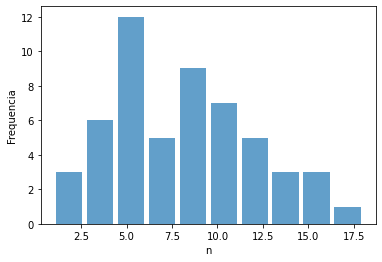

In [ ]:
plt.hist(dados_acidentes_mensal['n'], alpha=0.7, rwidth=0.85)
plt.xlabel('n')
plt.ylabel('Frequencia')

- Exemplo seaborn

Text(0.29999999999999716, 0.5, 'Frequencia')

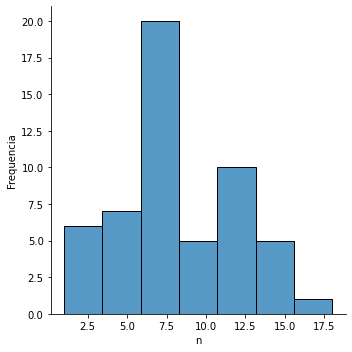

In [ ]:
sns.displot(dados_acidentes_mensal['n'])
plt.ylabel('Frequencia')

## Distribuições discretas

### Distribuição Binomial

- Uma empresa envia sms de propaganda para 50 clientes, a chance de 1 cliente acessar o link é de 5%. Qual a probabilidade de 5 clientes acessarem o link dos sms`s?

In [ ]:
# problema 1
n = 50
p = 0.05
x = 5

In [ ]:
binom.pmf(k=x, n = n, p = p)

0.06584063715436414

- Uma empresa envia email marketing para 70 clientes, a chance de 1 cliente acessar o link é de 2%. Qual a probabilidade de 4 clientes acessarem o link dos email`s?

In [ ]:
# problema 2
n = 70
p = 0.02
x = 4

In [ ]:
binom.pmf(k=x, n = n, p = p)

0.0386687900176071

- A chance de acidente mensal em uma fábrica com 200 funcionários é de 3%, qual a probabilidade de 7 a 10 funcionários sofrerem acidente este mês?

In [ ]:
# problema 3
n = 200
p = 0.03
x = [7, 8, 9, 10]

In [ ]:
np.sum(binom.pmf(k=x, n = n, p = p))

0.35355705742371435

### Distribuição Poisson

- Obter a média mensal dos dados

In [ ]:
media_mensal = np.mean(dados_acidentes_mensal['n'])

- Qual a probabilidade de ocorrer 7 acidentes?

In [ ]:
poisson.pmf(k = 7, mu=media_mensal)

0.13650388195181395

- Qual a probabilidade de ocorrer entre 4 a 6 acidentes?

In [ ]:
n_acidentes = np.arange(4, 7)

In [ ]:
np.sum(poisson.pmf(k = n_acidentes, mu=media_mensal))

0.2555945240092576

## Distribuições contínuas

### Distribuição exponencial

- Imagine que um ser humano possui um tempo médio de vida de 70 anos. Qual a probabilidade de um indivíduo usufruir a aposentadoria por mais de 15 anos, assumindo que o mesmo aposentou aos 65 anos?

In [ ]:
# problema 1
aposentadoria = 65
x = aposentadoria+15
tempo_medio_vida = 70

In [ ]:
1 - expon.cdf(x = x, scale = tempo_medio_vida)

0.31890655732397044

- Uma pessoa comprou um celular e espera utilizá-lo por mais de 3 anos. Qual a probabilidade de atingir este objetivo assumindo que o tempo médio de vida deste aparelho é de 2 anos?

In [ ]:
# problema 2
x = 3
tempo_medio_vida = 2

In [ ]:
1 - expon.cdf(x = x, scale = tempo_medio_vida)

0.2231301601484298

- Assumindo que o tempo médio de vida de um fone de ouvido seja de 1 ano. Qual a probabilidade de um indivíduo conseguir utilizá-lo entre 3 a 5 anos?

In [ ]:
# problema 3
tempo_medio_vida = 1
x_3anos = 3
x_5anos = 5

In [ ]:
expon.cdf(x = x_5anos, scale = tempo_medio_vida) - expon.cdf(x = x_3anos, scale = tempo_medio_vida)

0.043049121368778476

### Distribuição normal

- Qual a média mensal de vendas de vinhos nacional?

In [ ]:
media_mensal_vinho = np.mean(dados_vinho['vendas_vinho_nacional'])
media_mensal_vinho

339.05

-	Qual o desvio padrão de vendas de vinhos nacional?

In [ ]:
dp_mensal_vinho = np.std(dados_vinho['vendas_vinho_nacional'])
dp_mensal_vinho

7.116705698565875

-	Qual a probabilidade da empresa vender entre 330 e 370 garrafas de vinho nacional?

In [ ]:
p_330 = norm.cdf(x = 330, loc = media_mensal_vinho, scale = dp_mensal_vinho)

In [ ]:
p_370 = norm.cdf(x = 370, loc = media_mensal_vinho, scale = dp_mensal_vinho)

In [ ]:
p_370 - p_330

0.8982454369037137

-	O Marketing definiu uma meta de vendas para o mês de 370 garrafas de vinho nacional. Qual a probabilidade desta meta ser superada?

In [ ]:
p_370 = norm.cdf(x = 370, loc = media_mensal_vinho, scale = dp_mensal_vinho)

In [ ]:
1 - p_370

6.840408958486144e-06